### Parte 1: Teoría de Álgebra Lineal y Optimización

#### *1. ¿Por  qué una matriz equivale a una transformación lineal entre espacios vectoriales?*
Equivale a una transformación lineal ya que aplica sobre un vector siguiendo las reglas de linealidad y da como resultado otro vector en otro espacio vectorial

#### *2. ¿Cuál es el efecto de transformación lineal de una matriz diagonal y el de una matriz ortogonal?*
Para el caso de la matriz diagonal el efecto es un reescalamiento del vector y en el caso de una matriz ortogonal el efecto es una rotación y luego una reflexión

#### *3. ¿Qué es la descomposición en valores singulares de una matriz?*
Es la factorización del tipo $$ A = U\ \Sigma T^T $$
Donde una matriz se puede expresar como multiplicación de una matriz ortogonal U por una matriz diagonal y finalmente por otra matriz ortogonal.

#### *4. ¿Qué es diagonalizar una matriz y que representan los eigenvectores?*

Diagonalizar una matriz es encontrar una matriz tal que se cumpla 

$$ A = P D P^{-1} $$

donde P es invertible y cuyos vectores columna son los eigenvectores de A 

#### *5. ¿Intuitivamente qué son los eigenvectores?*

Los eigenvectores representan la dirección de la transformación sobre un vector

#### *6. ¿Cómo interpretas la descomposición en valores singulares como una composición de tres tipos de transformaciones lineales simples?*

Como la aplicación de una rotación $(U)$ luego un reescalamiento $(\Sigma)$ y finalmente otra rotación $(T^T)$

#### *7. ¿Qué relación hay entre la descomposición en valores singulares y la diagonalización?*

La diagonalización es un caso especial de SVD pero que solo es aplicable a matrices cuadradas

#### *8. ¿Cómo se usa la descomposición en valores singulares para dar un aproximación de rango menor a una matriz?*

Conociendo la SVD de una matriz, hay algunos valores de $\sigma $ que son significativos otros son extremadamente pequeños, esto es podemos expresar a la matriz A como $$ A = U\Sigma V^T =  \sum_{i=1}^{r} u_i\sigma_i v_i^T $$ 

Cualquier matriz es la suma de r matrices de rango 1


#### *9. Describe el método de minimización por descenso gradiente*

Se debe considerar un punto inicial posteriormente se escoge una dirección de descenso $d^k = -\nabla f(x^k)$, se realiza de manera iterativa $x^{k+1} = x^k + \alpha_k d^k $ hasta que el método converge


#### *10. Menciona 4 ejemplo de problemas de optimización (dos con restricciones y dos sin restricciones) que te parecan interesantes como Científico de Datos*




### Parte 2: Aplicaciones en Python

#### Ejercicio 1

In [6]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def readImage(pathFile):
    im = Image.open(pathFile)
    im = im.convert('LA')
    plt.figure(figsize=(6, 3))
    plt.imshow(im,cmap='gray')
    data = np.array(list(im.getdata(band=0)),int)
    data.shape = (im.size[1], im.size[0])
    data = np.matrix(data)
    return data

def SVD(data,k):
    U, s, V = np.linalg.svd(data)
    plt.imshow(np.matrix(U[:, :k]) * np.diag(s[:k]) * np.matrix(V[:k, :]), cmap='gray')
    titulo = "Imagen con k = %s" % k
    plt.title(titulo)
    plt.show()


Recibir el path de un archivo de imagen

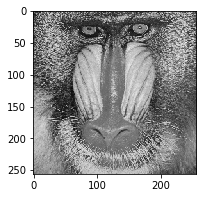

In [7]:
imagen = readImage("baboon_256.png")

Realizar y verificar la descomposición svd

In [9]:
U, s, V = np.linalg.svd(imagen)

In [10]:
U

matrix([[-0.0593057 ,  0.04325894,  0.0555638 , ...,  0.01595746,
         -0.01747723, -0.00057798],
        [-0.05662957,  0.03931229,  0.05171626, ...,  0.00128827,
         -0.01382701,  0.02491998],
        [-0.0568964 ,  0.06606275,  0.04204445, ...,  0.00647587,
          0.00673565, -0.00792678],
        ..., 
        [-0.06954698, -0.06411586, -0.0469386 , ..., -0.0408611 ,
          0.06753407,  0.00534301],
        [-0.06914702, -0.06586637, -0.05573401, ...,  0.02837686,
         -0.00949466,  0.11879121],
        [-0.06838292, -0.06884808, -0.05456415, ...,  0.17570835,
          0.1196998 , -0.0825264 ]])

In [15]:
imagenSVD = np.dot(np.dot(U,np.diag(s)),V)

Comprobando 

In [16]:
np.allclose(imagenSVD,imagen)

True

Usar la descomposición para dar una aproximación de grado k de la imagen

Para un grado 20, tenemos que

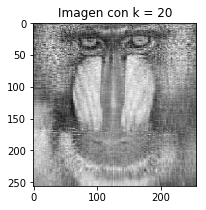

In [17]:
SVD(readImage("baboon_256.png"), 20)

Eligiendo distintos valores de k

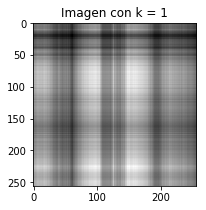

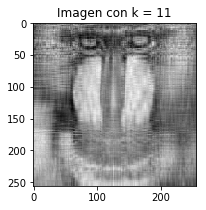

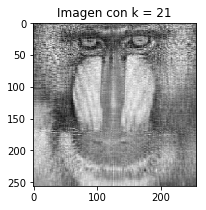

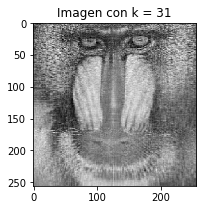

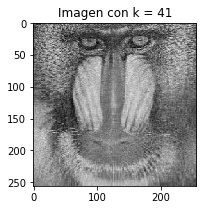

In [18]:
for k in range(1,50,10):
    SVD(readImage("baboon_256.png"),k)

*¿Qué tiene que ver este proyecto con compresión de imágenes?* 

Existe un valor de k para el cual la imagen se puede visualizar de manera similar al original considerando menos valores de la matriz que utiliza para su representación, esto puede ser utilizado en la compresión de imágenes.

#### Ejercicio 2

Programar una función que dada cualquier matriz devuelva la pseudainversa usando la descomposición SVD.

In [19]:
def pInverse(A):
    U,d,V = np.linalg.svd(A)
    ddiag = np.diag(d)
    for i in range(0,max(ddiag.shape)):
        if ddiag[i,i]!=0:
            ddiag[i,i] = 1/ddiag[i,i]
    return np.dot(np.dot(np.transpose(V),ddiag),np.transpose(U))

def solve(A,b):
    return np.dot(pInverse(A),b)

Jugar con el sistema Ax=b donde A=[[1,1],[0,0]] y b puede tomar distintos valores

In [24]:
A= np.array([[1,1],[0,0]])
b = np.array([[1],[1]])
x = solve(A,b)

In [25]:
print(x)

[[ 0.5]
 [ 0.5]]


In [26]:
b = np.array([[2],[2]])

In [27]:
x = solve(A,b)

In [28]:
print(x)

[[ 1.]
 [ 1.]]


In [29]:
b = np.array([[-2],[2]])

In [30]:
print(solve(A,b))

[[-1.]
 [-1.]]


La solución no es única y es del tipo $$x_1 = x_2$$ 

Repetir cambiando A=[[1,1],[0,1e-32]]

In [38]:
A= np.array([[1,1],[0,1e-32]])
b = np.array([[1],[1]])
x = solve(A,b)


In [39]:
print(x)

[[ -1.00000000e+32]
 [  1.00000000e+32]]


In [40]:
b = np.array([[2],[-2]])

In [41]:
x = solve(A,b)

In [37]:
print(x)

[[  2.00000000e+32]
 [ -2.00000000e+32]]


La solución no es única, pero difiere del caso anterior de que ahora es de la forma $$x_1 = -x_2$$

#### Ejercicio 3

Deben programar un script que lea el archivo study_vs_sat.csv y lo almacene como un data frame de pandas.

In [42]:
import pandas as pd

In [44]:
df=pd.read_csv('study_vs_sat.csv')

In [46]:
df

,study_hours,sat_score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410
5,7,530
6,12,600
7,22,790
8,1,350
9,3,400


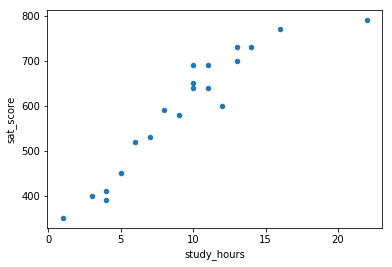

In [50]:
df.plot.scatter(x='study_hours',y='sat_score')

Pleantear como un problema de optimización que intente hacer una aproximación de la forma sat_score ~ alpha + beta*study_hours

Haciendo sat_score = sat , y study_hours = shours, lo que se puede expresar como 
$$ sat = \alpha + \beta \ shours + \epsilon_1 $$ 
Por lo que se busca minimizar el error $$ \epsilon_i $$ 
$$ \sum_{i=1}^{n} {\epsilon_i}^2 =  \sum_{i=1}^{n} {(sat_i - \alpha - \beta \ shours_i )}^2 $$ 
El gradiente es entonces 
$$ \frac{\partial}{\partial \alpha} = -2 \sum_{i=1}^{n} {(sat_i - \alpha - \beta \ shours_i )}$$
$$ \frac{\partial}{\partial \beta} = -2 \sum_{i=1}^{n} shours_i{(sat_i - \alpha - \beta \ shours_i )}$$

Programar una función que reciba valores de alpha, beta y el vector sat_score y devuelva un vector array de numpy de predicciones

In [64]:
def predictions(alfa,beta,vector):
    valfa = alfa * np.ones(vector.shape[0])    
    return valfa + np.dot(beta,vector)

In [69]:
predictions(5,100,np.array(df['study_hours']))

array([  405.,   905.,  1005.,  1405.,   405.,   705.,  1205.,  2205.,
         105.,   305.,   805.,  1105.,   505.,   605.,  1005.,  1105.,
        1605.,  1305.,  1305.,  1005.])

Definan un numpy array X de dos columnas, la primera con unos en todas sus entradas y la segunda con la variable study_hours

In [95]:
sh = np.array(df['study_hours'])
sh.shape
X = np.ones((sh.shape[0], 2))
X[:,1] = sh

Calculen la pseudoinversa X^+ de X y computen (X^+)*sat_score para obtener alpha y beta soluciones.

In [99]:
Xinv = np.linalg.pinv(X)

In [100]:
sc = np.array(df['sat_score'])

In [103]:
b = np.dot(Xinv,sc)

In [104]:
b

array([ 353.1648795 ,   25.32646778])

Comparen la solución anterior con la de la fórmula directa de solución exacta (alpha,beta)=(X^t*X)^(-1)*X^t*study_hours.

In [120]:
b_directo = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),sc))

In [121]:
b_directo

array([ 353.1648795 ,   25.32646778])

In [122]:
np.allclose(b,b_directo)

True

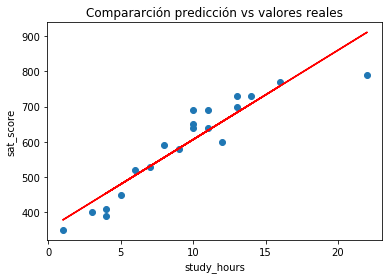

In [140]:
plt.scatter(sh,sc)
plt.plot(sh, sh*b[1] + b[0],color="red")
plt.title("Compararción predicción vs valores reales")
plt.xlabel("study_hours")
plt.ylabel("sat_score")
plt.show()